In [1]:
from src.Sonufy import *
from src.AudioDataGenerator import AudioDataGenerator
import matplotlib.pyplot as plt

In [2]:
adg = AudioDataGenerator(batch_size=32, input_size=(64,1030), output_size=(64,64), directory='data/mels', shorten_factor=2)

Found 131278 files for prediction set


In [68]:
sonufy = Sonufy(latent_dims=128, output_size=(64,64), final_shorten_factor=2)

In [69]:
sonufy.build_model(filters=(16,32,64,256))

In [ ]:
sonufy.train(mel_directory='data/mels', epochs=10, train_test_split=.02, batch_size=128, sample_size=100000)

Found 98000 files for training set
Found 2000 files for testing set
Epoch 1/10
765/765 [==============================] - 363s 473ms/step - loss: 0.0106 - val_loss: 0.0072
Epoch 2/10
765/765 [==============================] - 365s 477ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 3/10
765/765 [==============================] - 368s 480ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 4/10
765/765 [==============================] - 368s 481ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 5/10
765/765 [==============================] - 374s 489ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 6/10
765/765 [==============================] - 389s 508ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 7/10
765/765 [==============================] - 389s 508ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 8/10
736/765 [===========================>..] - ETA: 15s - loss: 0.0047

In [ ]:
sonufy.save_encoder('data/test_128dim_256f')
sonufy.build_vectors_from_model(mel_directory='data/mels', all_tracks_file='data/all_tracks_shuffled.feather')
sonufy.save('data/test_128dim_256f')

In [35]:
# sonufy.load('data/test_128dim_newmels/')

In [ ]:
test_img = adg.take(6)[0]
test_img2 = adg.take(0)[0]

Two separate images taken from different tracks:

In [ ]:
plt.imshow(test_img[0], origin='lower')
plt.show()
plt.imshow(test_img2[0], origin='lower')
plt.show()

Autoencoder predictions for those images.

In [ ]:
plt.imshow(sonufy.autoencoder(test_img)[0], origin='lower')
plt.show()
plt.imshow(sonufy.autoencoder(test_img2)[0], origin='lower')
plt.show()

Distribution comparison between two images.

In [ ]:
plt.hist(np.array(test_img[0]).reshape(-1), alpha=0.5, label='img1')
plt.hist(np.array(test_img2[0]).reshape(-1), alpha=0.5, label='img2')
plt.legend()
plt.show()

Distribution comparision between one image and the prediction.

In [ ]:
plt.hist(np.array(test_img[0]).reshape(-1), alpha=0.5, label='original')
plt.hist(np.array(sonufy.autoencoder(test_img)[0]).reshape(-1), alpha=0.5, label='prediction')
plt.legend()
plt.show()

comparison between encoded original and encoded prediction

In [ ]:
concat_img = np.array([sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(test_img)[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img, aspect=8)

compare encoded between two images

In [ ]:
concat_img_compare = np.array([sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(sonufy.autoencoder(test_img2))[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img_compare, aspect=8)

compare encoded between two images and the mean of the first image batch.

In [ ]:
concat_img_compare = np.array([np.array(sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))).mean(axis=0), sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(sonufy.autoencoder(test_img2))[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img_compare, aspect=8)

Look at the scale of each feature in the encoded space. Needs to be scaled which is what is happening later on.

In [ ]:
pd.Series(np.array(sonufy.autoencoder.encoder(test_img)[0]).reshape(-1))

In [ ]:
concat_img_compare[0].shape

heat map cosine similarity between encoded images for entire batch vs batch

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

plt.figure(figsize=(10,10))
plt.imshow(cosine_similarity(sonufy.autoencoder.encoder(test_img), sonufy.autoencoder.encoder(test_img2)), cmap='magma')
plt.xticks(ticks=range(32))
plt.yticks(ticks=range(32))
plt.colorbar()
plt.show()

cosine similarity between mean and the entire batch of the second image.

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(cosine_similarity(np.array(sonufy.autoencoder.encoder(test_img)).mean(axis=0).reshape(1,-1), sonufy.autoencoder.encoder(test_img2)), cmap='magma')
plt.xticks(ticks=range(32))
plt.show()

cosine similarity between encoded space of the mean of the two images.

In [ ]:
cosine_similarity(np.array(sonufy.autoencoder.encoder(test_img)).mean(axis=0).reshape(1,-1), np.array(sonufy.autoencoder.encoder(test_img2)).mean(axis=0).reshape(1,-1))


In [ ]:
a, b, c, d = sonufy.search_for_recommendations(query='uncontrollable urge', get_time_and_freq=True)

In [ ]:
a['name']

In [ ]:
b

In [49]:
similarity_img = np.concatenate([np.array(d), np.array(c[sonufy.latent_cols])])

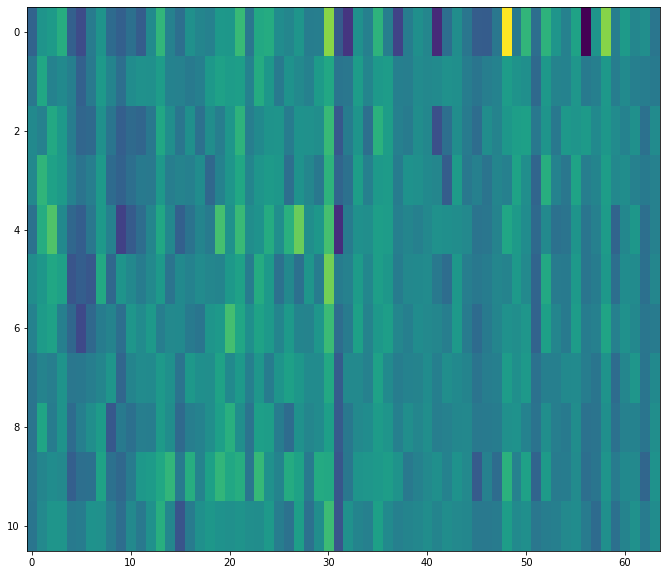

In [50]:
plt.figure(figsize=(20,10))
plt.imshow(similarity_img, aspect=5)

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
mean_squared_error(test_img[0].reshape(64,64), np.array(sonufy.autoencoder(test_img)[0]).reshape(64,64))

0.0036256783996364405